In [1]:
import os
import glob
import re
import copy
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# suffix_logdir = "test"
logbase = f"../log"
savefolder = "./fig_update/"


os.makedirs(savefolder, exist_ok=True)
small = (4, 4)
medium = (6, 6)

figsize = medium

plt.rcParams["figure.figsize"] = figsize
plt.rc('xtick', labelsize=32)
plt.rc('ytick', labelsize=32)
plt.rc('axes', labelsize=36)
titlesize = 40
linewidth = 1.5
legendfontsize = 18

trainTypeSet = ["random","sort","sequtial"]

trainType = trainTypeSet[0]

logdir = f"{logbase}/{trainType}"
parsed_dir = f"parsed/{trainType}"

breakdown_parsed_log = []
breakdown_col_name = ["Time","Frame","bytes","Server/Client", "Dest"]
simple_dir_pattern = logbase

def redefine(tr_type):
    global trainType
    global logdir
    global parsed_dir
    trainType = tr_type
    logdir = f"{logbase}/{trainType}"
    parsed_dir = f"parsed/{trainType}"

def get_dirname():
    dir_names = {}
    for logtype in logtypes:
        dir_names[logtype] = glob.glob(
            simple_dir_pattern.format(logtype)+f"/*/*/*/*/*/*/*/")

    return dir_names

def replace_str( target):
    target = target.replace('\n', '')
    target = target.replace(',', '')
    return target

def find_value( arr, target, jumpto=1):
    try:
        num = replace_str(arr[arr.index(target)+jumpto])
    except:
        print(arr, target, arr[arr.index(target)+jumpto])
        num = 'NA'
    return num

def split_info( line):
    replace_txt = line.replace(' ', ' ')
    test = replace_txt.split(' ')
    return list(filter(lambda x: x != "", test))

def parse(_logfile):
    global breakdown_parsed_log
    # Parse line one by one
    for line in open(_logfile, 'r').readlines():
#         print(line)
        if line.find(f'client received') != -1:  # start log
            info = split_info(line)
            time = find_value(info, "time").replace("s","")
            frame = find_value(info, "frame")
            byte = find_value(info, "bytes", -1)
            
            breakdown_parsed_log.append([time, frame, byte, "Client", "NaN"])
        elif line.find(f'server sent') != -1:  # start log
            info = split_info(line)
            time = find_value(info, "time").replace("s","")
            frame = find_value(info, "frame")
            byte = find_value(info, "bytes", -1)
            client = find_value(info, "to")
            
            breakdown_parsed_log.append([time, frame, byte, "Server", client])
        else:
            pass





In [2]:
for tr_type in trainTypeSet:
    print(tr_type)
    redefine(tr_type)
    dir_names = glob.glob(f"../log/{tr_type}*.log")
    print(dir_names)
    for _logdir in dir_names:
        breakdown_parsed_log = []
        if not os.path.exists("../log") or not os.path.isfile(_logdir):
            continue
        logdir_list = _logdir.split('/')
        parse_filename = logdir_list[-1].split(".")[0]

        parse(_logdir)

        data = pd.DataFrame(breakdown_parsed_log,
                                    columns=breakdown_col_name)
        os.makedirs(parsed_dir, exist_ok=True)
        data.to_csv(parsed_dir+"/"+parse_filename +
                                                ".csv", sep=',', na_rep='NaN')

#         client = [data["Server/Client"] == "Client"]
#         server = [data["Server/Client"] == "Server"]
#         yaxis = [""]
#         ###### Plot ######
#         # -----------------
#         # Line with different marker
#         ax = data.plot.line(use_index=True, y=yaxis)
#         ymin = 0
#         ymax = 400
#         ax.set_ylim(ymin=ymin, ymax=ymax)

#         ax.set_xlabel('Time (sec)')
#         ax.set_ylabel('Disk Usage\n(MB)')
        
#         plt.legend(fontsize=self.legendfontsize)
#         plt.axhline(y=390.6525, color='r', linewidth=1.5, linestyle="--", alpha=0.75)

        
#         # Tick setup
#         ax.tick_params(direction="in")

#         _save_and_show(filename)


random
['../log/random6.log', '../log/random.log', '../log/random10.log', '../log/random3.log', '../log/random3_10.log']
sort
['../log/sort10.log', '../log/sort3.log', '../log/sort.log']
sequtial
['../log/sequtial.log', '../log/sequtial10.log', '../log/sequtial3.log']


In [3]:
total_data = None
random_data = pd.read_csv("./parsed/random/random3.csv",
                        sep=',' )
sort_data = pd.read_csv("./parsed/sort/sort3.csv",
                        sep=',' )
sequtial_data = pd.read_csv("./parsed/sequtial/sequtial3.csv",
                        sep=',' )

random_client = random_data[random_data["Server/Client"] == "Client"]
sort_client = sort_data[sort_data["Server/Client"] == "Client"]
sequtial_client = sequtial_data[sequtial_data["Server/Client"] == "Client"]

total_data = pd.merge(random_client,sort_client, on='Time', how='outer', suffixes=('_Ours', '_Non-persistent'),)
total_data = pd.merge(total_data,sequtial_client, on='Time', how='outer',  suffixes=('', '_Persistent'))
total_data.to_csv(parsed_dir+"/"+"total.csv", sep=',', na_rep='NaN')


In [4]:
print(total_data[["Time","Frame_Ours","Frame_Non-persistent","Frame"]])
total_data.sort_values(by=['Time'], axis=0)


         Time  Frame_Ours  Frame_Non-persistent  Frame
0    0.523854         0.0                   0.0    0.0
1    0.528958         1.0                   1.0    1.0
2    0.540059         0.0                   0.0    0.0
3    0.545047         1.0                   1.0    1.0
4    0.549902         2.0                   2.0    2.0
..        ...         ...                   ...    ...
773  5.710450         NaN                   NaN   90.0
774  5.732240         NaN                   NaN   90.0
775  5.953280         NaN                   NaN   91.0
776  5.957190         NaN                   NaN   91.0
777  5.979870         NaN                   NaN   91.0

[778 rows x 4 columns]


,Unnamed: 0_Ours,Time,Frame_Ours,bytes_Ours,Server/Client_Ours,Dest_Ours,Unnamed: 0_Non-persistent,Frame_Non-persistent,bytes_Non-persistent,Server/Client_Non-persistent,Dest_Non-persistent,Unnamed: 0,Frame,bytes,Server/Client,Dest
0,5.0,0.523854,0.0,4200.0,Client,NaN,5.0,0.0,4200.0,Client,NaN,5.0,0.0,4200.0,Client,NaN
1,9.0,0.528958,1.0,4200.0,Client,NaN,9.0,1.0,4200.0,Client,NaN,9.0,1.0,4200.0,Client,NaN
2,13.0,0.540059,0.0,4200.0,Client,NaN,13.0,0.0,4200.0,Client,NaN,13.0,0.0,4200.0,Client,NaN
3,16.0,0.545047,1.0,3081.0,Client,NaN,16.0,1.0,3081.0,Client,NaN,16.0,1.0,3081.0,Client,NaN
4,18.0,0.549902,2.0,3081.0,Client,NaN,18.0,2.0,3081.0,Client,NaN,18.0,2.0,3081.0,Client,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,NaN,5.957190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,552.0,91.0,215970.0,Client,NaN
777,NaN,5.979870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,553.0,91.0,215970.0,Client,NaN
253,532.0,5.982180,91.0,185054.0,Client,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,533.0,5.983700,91.0,186200.0,Client,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


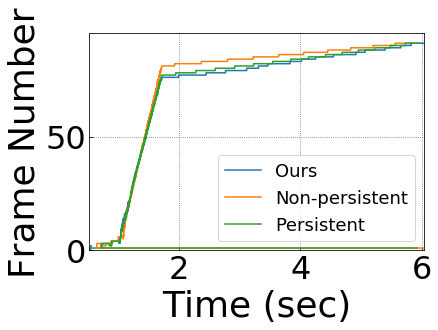

In [5]:
import matplotlib.pyplot as plt
        
def _save_and_show(filename):
    # Tick setup
    plt.grid(b=True, which='major', color='#666666', linestyle=':')

    plt.savefig(savefolder+filename.replace(".csv", ""), bbox_inches='tight')
    plt.show()
    
yaxis = ["Frame_Ours","Frame_Non-persistent","Frame"]
###### Plot ######
# -----------------
# Line with different marker


ax = total_data.plot.line(x="Time", y=yaxis,drawstyle='steps')

ymin = 0
ax.set_ylim(ymin=ymin)

ax.set_xlabel('Time (sec)')
ax.set_ylabel('Frame Number')

L=plt.legend(fontsize=legendfontsize)
L.get_texts()[0].set_text('Ours')
L.get_texts()[1].set_text('Non-persistent')
L.get_texts()[2].set_text('Persistent')
# Tick setup
ax.tick_params(direction="in")

_save_and_show("frame.pdf")

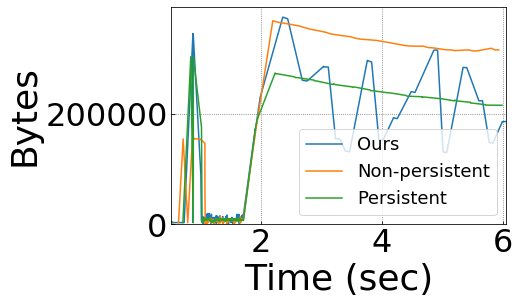

In [6]:
import matplotlib.pyplot as plt
        
def _save_and_show(filename):
    # Tick setup
    plt.grid(b=True, which='major', color='#666666', linestyle=':')

    plt.savefig(savefolder+filename.replace(".csv", ""), bbox_inches='tight')
    plt.show()
    
yaxis = ["bytes_Ours","bytes_Non-persistent","bytes"]
###### Plot ######
# -----------------
# Line with different marker


ax = total_data.plot.line(x="Time", y=yaxis)

ymin = 0
ax.set_ylim(ymin=ymin)

ax.set_xlabel('Time (sec)')
ax.set_ylabel('Bytes')

L=plt.legend(fontsize=legendfontsize)
L.get_texts()[0].set_text('Ours')
L.get_texts()[1].set_text('Non-persistent')
L.get_texts()[2].set_text('Persistent')
# Tick setup
ax.tick_params(direction="in")

_save_and_show("bytes.pdf")